<a href="https://colab.research.google.com/github/VahapML/Fundamentals-of-TinyML/blob/main/ComputerVisionAndCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# Load fashion mnist data, reshape and normalize to input CNN model

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (val_images, val_labels) = mnist.load_data()

training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.

val_images = val_images.reshape(10000, 28, 28, 1)
val_images = val_images / 255.

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# create convolutional neural network

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units=20, activation="relu"),
                                    tf.keras.layers.Dense(units=10, activation="softmax")])

In [4]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 20)                3

In [5]:
# train the network
model.fit(training_images, training_labels, epochs=15, verbose=2, validation_data=(val_images, val_labels))

Epoch 1/15
1875/1875 - 22s - loss: 0.5264 - accuracy: 0.8067 - val_loss: 0.4258 - val_accuracy: 0.8422 - 22s/epoch - 12ms/step
Epoch 2/15
1875/1875 - 9s - loss: 0.3402 - accuracy: 0.8775 - val_loss: 0.3286 - val_accuracy: 0.8831 - 9s/epoch - 5ms/step
Epoch 3/15
1875/1875 - 9s - loss: 0.2924 - accuracy: 0.8949 - val_loss: 0.3005 - val_accuracy: 0.8942 - 9s/epoch - 5ms/step
Epoch 4/15
1875/1875 - 11s - loss: 0.2619 - accuracy: 0.9045 - val_loss: 0.2861 - val_accuracy: 0.8965 - 11s/epoch - 6ms/step
Epoch 5/15
1875/1875 - 9s - loss: 0.2395 - accuracy: 0.9130 - val_loss: 0.2722 - val_accuracy: 0.9039 - 9s/epoch - 5ms/step
Epoch 6/15
1875/1875 - 9s - loss: 0.2198 - accuracy: 0.9198 - val_loss: 0.3037 - val_accuracy: 0.8899 - 9s/epoch - 5ms/step
Epoch 7/15
1875/1875 - 9s - loss: 0.2048 - accuracy: 0.9255 - val_loss: 0.2638 - val_accuracy: 0.9068 - 9s/epoch - 5ms/step
Epoch 8/15
1875/1875 - 10s - loss: 0.1905 - accuracy: 0.9293 - val_loss: 0.2963 - val_accuracy: 0.8956 - 10s/epoch - 5ms/step
E

In [6]:
print(val_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [7]:
# import pyplot to visualize data
import matplotlib.pyplot as plt

In [8]:
# create a function to show an image

def show_image(image_index):
  plt.figure()
  plt.imshow(val_images[image_index].reshape(28, 28))
  plt.grid(False)
  plt.show()

In [27]:
# By scanning the list above I saw that the 0, 23 and 28 entries are all label 9 
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28

# For shoes (0, 23, 28), Convolution_Number=1 (i.e. the second filter) shows
# the sole being filtered out very clearly

CONVOLUTION_NUMBER = 10
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]

print(layer_outputs)

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten')>, <KerasTensor: shape=(None, 20) dtype=float32 (created by layer 'dense')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]


In [28]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
print(activation_model)

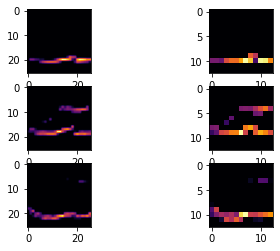

In [29]:
f, axarr = plt.subplots(3, 2)
for x in range(0,2):
  f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

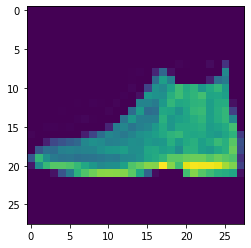

In [12]:
show_image(FIRST_IMAGE)

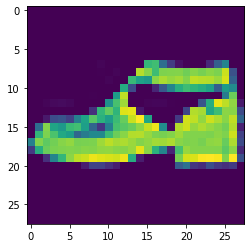

In [13]:
show_image(SECOND_IMAGE)

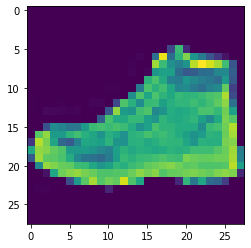

In [14]:
show_image(THIRD_IMAGE)